In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the data

In [73]:
data = pd.read_csv("C:/Users/flolo/OneDrive/Desktop/machine/titanic.csv")
data.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [74]:
## statistical info
data.describe()

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [75]:
## datatype info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   name      1309 non-null   object 
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   ticket    1309 non-null   object 
 7   fare      1308 non-null   float64
 8   cabin     295 non-null    object 
 9   embarked  1307 non-null   object 
 10  survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


## Exploring the data

seeing how many people survived and at what percentage 

Text(0.5, 1.0, 'Distribution of Survived')

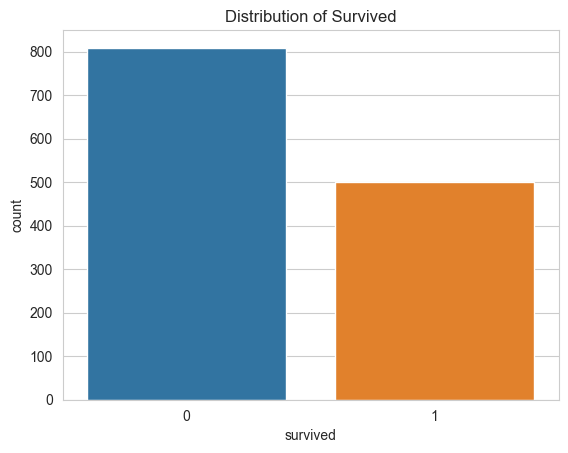

In [76]:
sns.set_style('whitegrid')
sns.countplot(x='survived', data=data)
plt.title('Distribution of Survived')

- looks like almost half of them didn't survive

In [77]:
survived=sum(data['survived']==1)
total=len(data['survived'])
survived_percentage= survived / total
print ('Number of survived people is: ', survived)
print('\n')
print ('Survived Percentage is: ',survived_percentage )

Number of survived people is:  500


Survived Percentage is:  0.3819709702062643


- as we saw only 38% of them survived

seeing the survivals in relation to sex and class

<AxesSubplot: xlabel='survived', ylabel='count'>

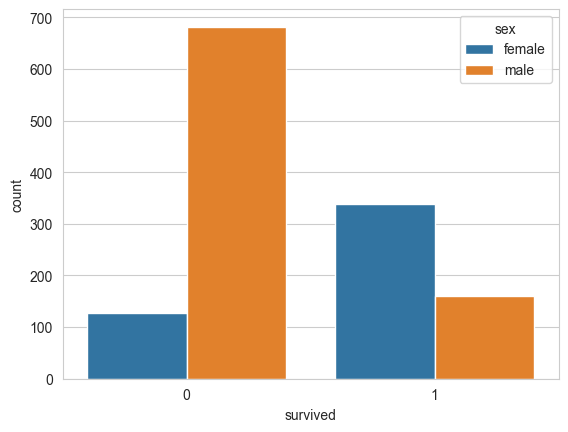

In [78]:
sns.set_style('whitegrid')
sns.countplot(x='survived', hue='sex', data=data)

looks like most of the survivors are females

<AxesSubplot: xlabel='survived', ylabel='count'>

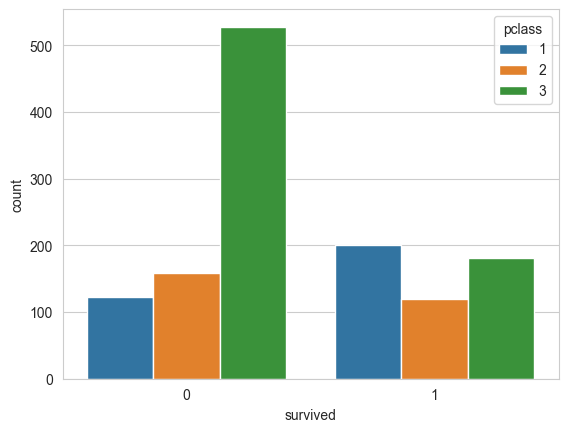

In [79]:
sns.countplot(x='survived', hue='pclass', data=data)

([<matplotlib.axis.XTick at 0x2381135fe50>,
 [Text(1, 0, 'First'), Text(2, 0, 'Second'), Text(3, 0, 'Third')])

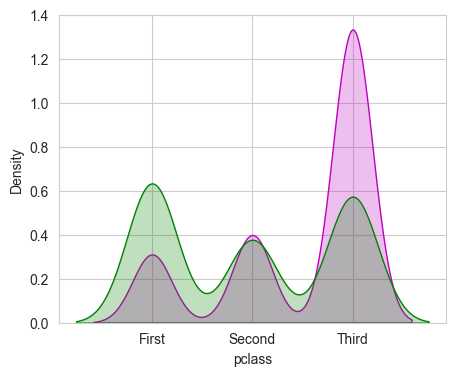

In [80]:
plt.subplots(figsize=(5,4))
sns.kdeplot(data.loc[(data['survived'] == 0),'pclass'],shade=True,color='m',label='Not Survived')
ax=sns.kdeplot(data.loc[(data['survived'] == 1),'pclass'],shade=True,color='g',label='Survived' )

labels = ['First', 'Second', 'Third']
plt.xticks(sorted(data.pclass.unique()),labels)

looks like most people who survived are from the first class

<AxesSubplot: xlabel='age', ylabel='Density'>

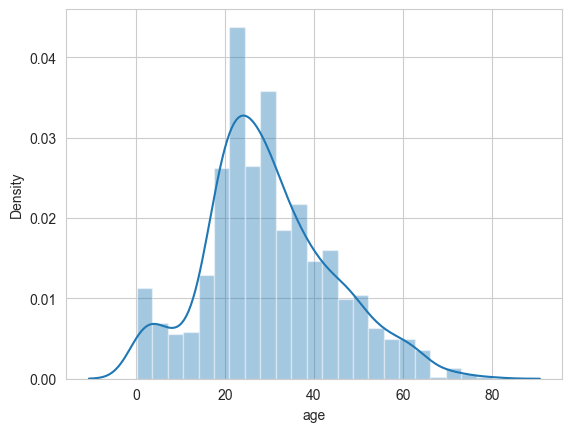

In [81]:
## numerical attributes
sns.distplot(data['age'])

<AxesSubplot: xlabel='fare', ylabel='Density'>

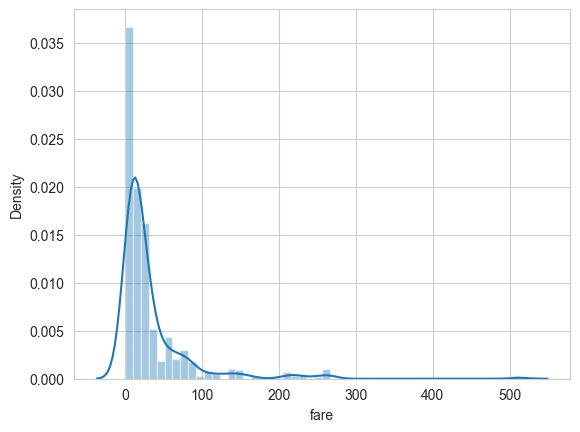

In [82]:
sns.distplot(data['fare'])

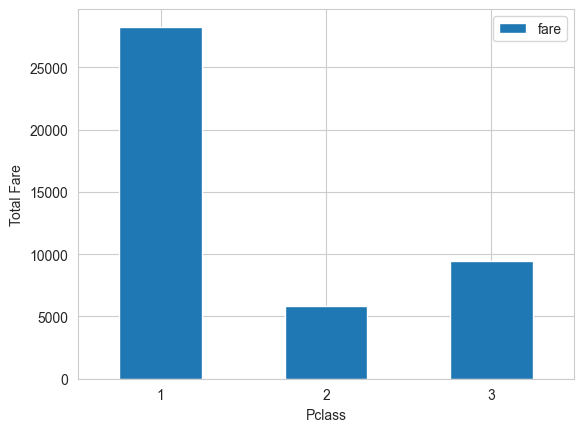

In [83]:
class_fare = data.pivot_table(index='pclass', values='fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()

<AxesSubplot: xlabel='pclass', ylabel='fare'>

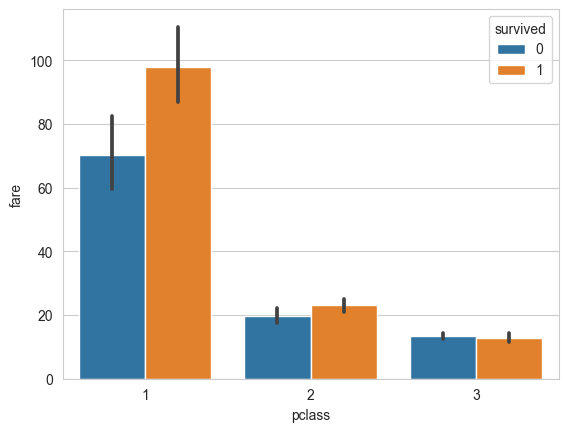

In [84]:
sns.barplot(data=data, x='pclass', y='fare', hue='survived')

<AxesSubplot: xlabel='survived', ylabel='fare'>

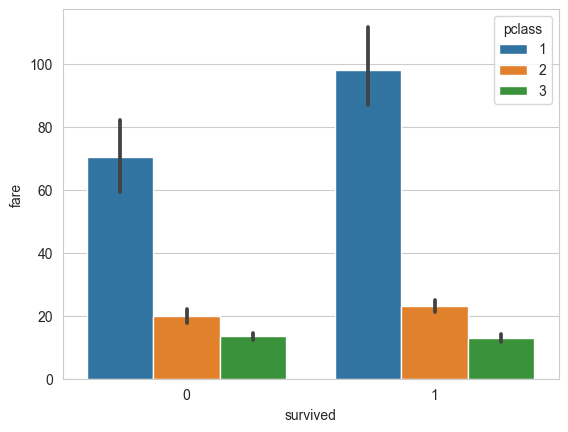

In [85]:
sns.barplot(data=data, x='survived', y='fare', hue='pclass')

# preprocessing

converting the cateogric values to numeric of 0 and 1

In [86]:
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
data['embarked'] = data['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

dropping unwanted columns

In [87]:
data.drop(columns=['name', 'ticket','cabin'], inplace=True)
data.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,1,29.0000,0,0,211.3375,0.0,1
1,1,0,0.9167,1,2,151.5500,0.0,1
2,1,1,2.0000,1,2,151.5500,0.0,0
3,1,0,30.0000,1,2,151.5500,0.0,0
4,1,1,25.0000,1,2,151.5500,0.0,0


searching for null values

In [88]:
data.isnull().sum()

pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
survived      0
dtype: int64

filling the non value features with the value of median for the age column as it has many missing values and i need it


In [89]:
data['age'].fillna(data['age'].median(), inplace=True)
data['embarked'].fillna(data['embarked'].median(), inplace=True)
data['fare'].fillna(data['fare'].median(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   sex       1309 non-null   int64  
 2   age       1309 non-null   float64
 3   sibsp     1309 non-null   int64  
 4   parch     1309 non-null   int64  
 5   fare      1309 non-null   float64
 6   embarked  1309 non-null   float64
 7   survived  1309 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 81.9 KB


In [90]:
data.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
survived    0
dtype: int64

# outliers

In [91]:
numerical_columns = ['age', 'fare', 'sibsp', 'parch']

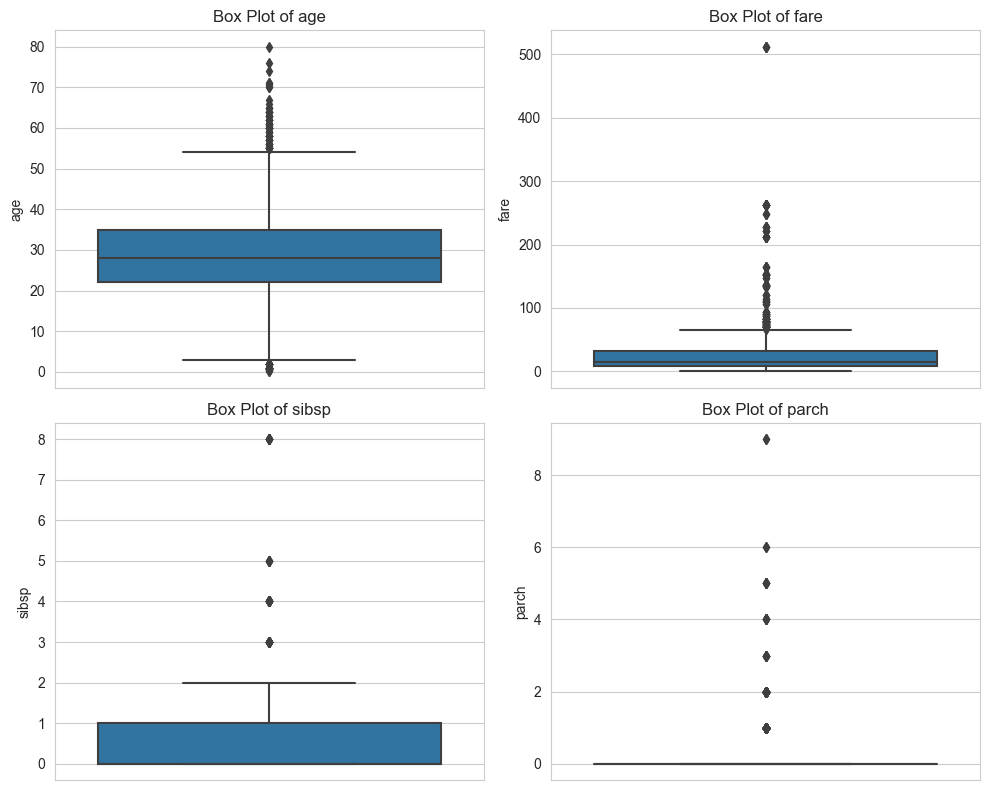

In [92]:
# Create box plots for each numerical column
plt.figure(figsize=(10, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

In [93]:
for column in numerical_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

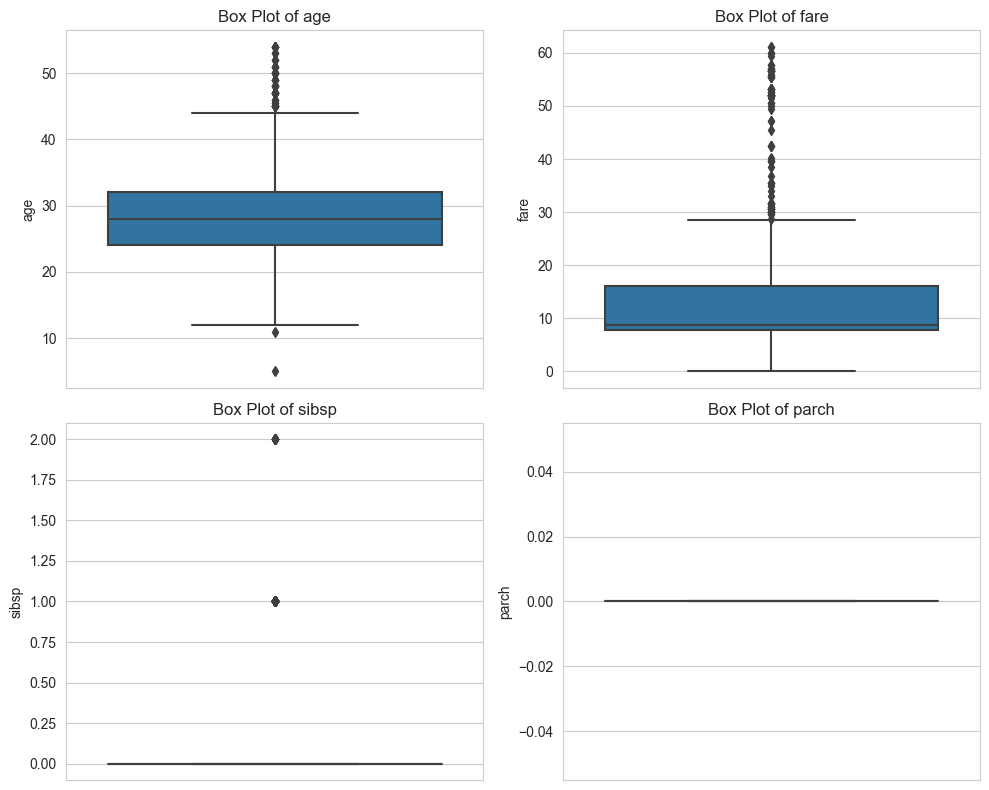

In [94]:
# Create box plots for each numerical column
plt.figure(figsize=(10, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

## Splitting the data

In [95]:
data.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
5,1,0,48.0,0,0,26.5500,0.0,1
7,1,0,39.0,0,0,0.0000,0.0,0
8,1,1,53.0,2,0,51.4792,0.0,1
15,1,0,28.0,0,0,25.9250,0.0,0
22,1,0,26.0,0,0,30.0000,1.0,1


In [96]:
from sklearn.model_selection import train_test_split
X = data.drop('survived', axis=1)
y = data['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
X_train.shape, X_test.shape

((685, 7), (172, 7))

# naive bayes

In [98]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score   

In [99]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

In [100]:
#getting thr accuracy of the model in the test data
y_pred_test = naive_bayes_classifier.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7616


In [101]:
#getting thr accuracy of the model in the train data
y_pred_train = naive_bayes_classifier.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7781


### Naive Bayes Confusion Matrix

In [102]:
cm = confusion_matrix(y_test, y_pred_test)

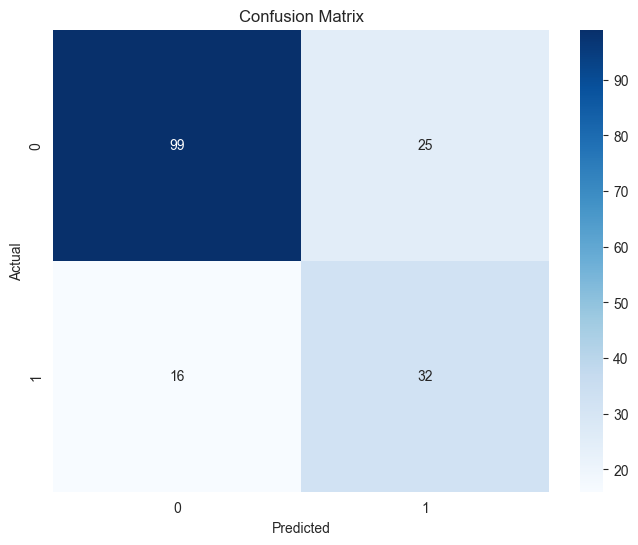

In [103]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# SVM

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [105]:
svm = SVC()

In [106]:
#Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.
svm.fit(X_train,y_train)

SVC()

In [107]:
# make predictions on test set
y_pred=svm.predict(X_test)

In [108]:
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.7267


In [109]:
svm_classifier = SVC(kernel='rbf', C=100.0)

# Train the classifier
svm_classifier.fit(X_train, y_train)

SVC(C=100.0)

In [110]:
y_preddd = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_preddd)
print("Accuracy:", accuracy)

Accuracy: 0.7906976744186046


In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_preddd, average='weighted')
f1 = f1_score(y_test, y_preddd, average='weighted')

# Print evaluation metrics

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Precision: 0.6861
Recall: 0.7907
F1-score: 0.7907


In [112]:
cm = confusion_matrix(y_test, y_preddd)

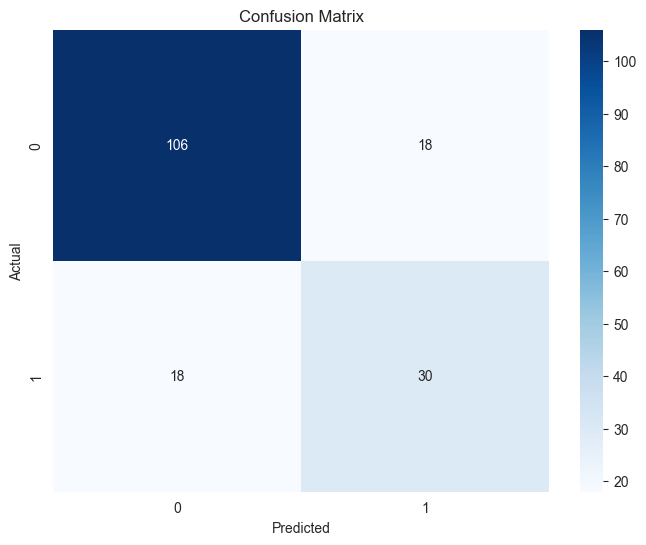

In [113]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# KNN

In [114]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [115]:
param_grid = {
    'n_neighbors': [3, 5, 7],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}


In [116]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev'],
                         'n_neighbors': [3, 5, 7]},
             scoring='accuracy')

In [117]:
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 7}


In [118]:
best_knn = grid_search.best_estimator_
y_pred_test = best_knn.predict(X_test)

In [119]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')

In [120]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7790697674418605
Precision: 0.7650332225913622
Recall: 0.7790697674418605
F1 Score: 0.7636715997181115


### KNN Confusion Matrix

In [121]:
cm = confusion_matrix(y_test, y_pred)

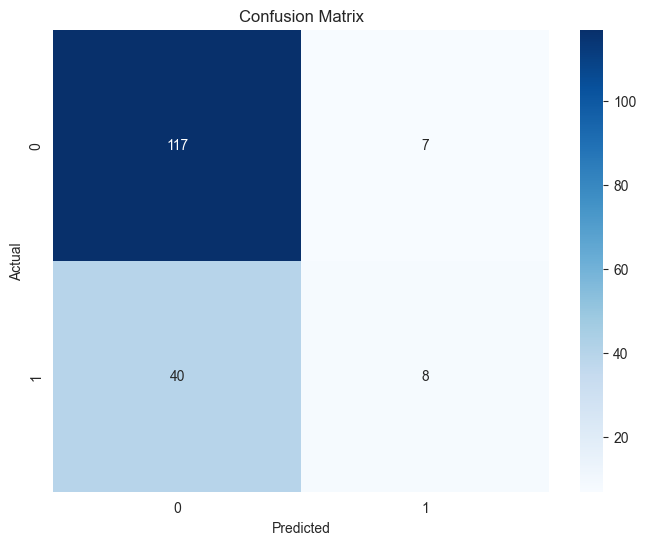

In [122]:
 # Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ANN

In [123]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [124]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)

In [125]:
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [126]:
y_predd = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_predd)
precision = precision_score(y_test, y_predd, average='weighted')
recall = recall_score(y_test, y_predd, average='weighted')
f1 = f1_score(y_test, y_predd, average='weighted')

In [127]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7907
Precision: 0.7882
Recall: 0.7907
F1-score: 0.7893


### ANN Confusion Matrix

In [128]:
cm = confusion_matrix(y_test, y_predd)

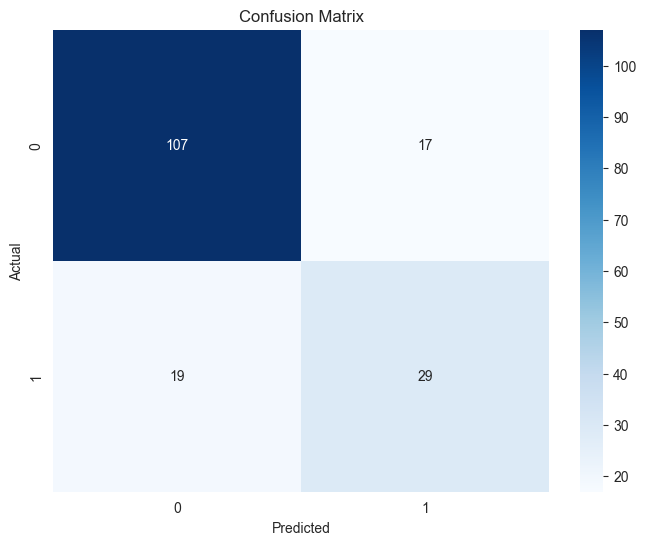

In [129]:
 # Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# test data

In [130]:
#importing the test data
new_data= pd.read_csv("C:/Users/flolo/OneDrive/Desktop/machine/test.csv")
new_data.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [131]:
#dropping unwanted columns
new_data.drop(columns=['name', 'ticket','cabin'], inplace=True)
new_data.head()


,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [132]:
#converting the cateogric values to numeric of 0 and 1
new_data['sex'] = new_data['sex'].map({'male': 0, 'female': 1})
new_data['embarked'] = new_data['embarked'].map({'S': 0, 'C': 1, 'Q': 2})
new_data['age'].fillna(new_data['age'].median(), inplace=True)
new_data['fare'].fillna(new_data['fare'].median(), inplace=True)

In [133]:
new_data.isnull().sum()


pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [134]:
prediction =naive_bayes_classifier.predict(new_data)
prediction

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1],
      dtype=int64)

In [135]:
prediction =svm_classifier.predict(new_data)
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1],
      dtype=int64)

In [136]:
prediction =best_knn.predict(new_data)
prediction

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
      dtype=int64)

In [137]:
prediction =mlp.predict(new_data)
prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
      dtype=int64)

## Comparative Analysis:

##### 1. naive bayes

Strengths:
* It is simple and easy to implement, making it computationally efficient.
* It performs well with small datasets and when the assumption of independence between features holds true.
* It works well with categorical features.

Weaknesses:
* It assumes that all features are independent, which might not always be the case.
* It can be sensitive to irrelevant features.
* It may not perform well with highly correlated features.

##### 2. K-Nearest Neighbors [KNN]

Strengths:
* It is a non-parametric method, meaning it makes no assumptions about the underlying data distribution.
* It is intuitive and easy to understand.
* It can capture complex relationships in the data.

Weaknesses:
* It can be computationally expensive, especially with large datasets, as it requires storing all training data.
* It is sensitive to irrelevant or redundant features.
* The choice of k (number of neighbors) can significantly impact the results.


##### 3. Support Vector Machine (SVM)

Strengths:
* It works well in high-dimensional spaces, making it suitable for datasets with many features.
* It is effective in cases where the number of dimensions exceeds the number of samples.
* It can handle non-linear decision boundaries using kernel tricks.

Weaknesses:
* It can be sensitive to the choice of the kernel and its parameters.
* It does not directly provide probability estimates, requiring additional computation.
* It can be computationally expensive, particularly with large datasets.


### Considering the accuracy scores obtained 

Naive Bayes 
* accuracy: 77%

KNN 
* Best k value: 7 with accuracy: 77%     

SVM
* accuracy: 79%

ANN
* accuracy: 79%

The SVM and ANN are algorithms outperform the other three algorithms in terms of accuracy therefore its the chosen algorithm.